In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper', font_scale=1.5)

In [2]:
threshold = 50

In [3]:
results_openml = pd.read_csv('../mementoML_results/results.csv')
df_openml = results_openml.copy()
df_openml.columns = ['target', 'set_index', 'AUC']
openml_names = {37: 'diabetes', 44: 'spambase', 1043: 'ada_agnostic', 1046: 'mozilla4', 1049: 'pc4', 1050: 'pc3',
            1063: 'kc2', 1067: 'kc1', 1068: 'pc1', 1120: 'MagicTelescope', 1462: 'banknote-authentication',
            1464: 'blood-transfusion', 1467: 'climate-model', 1471: 'eeg-eye-state',
            1479: 'hill-valley', 1485: 'madelon', 1487: 'ozone-level-8hr', 1489: 'phoneme', 1494: 'qsar-biodeg',
            1504: 'steel-plates-fault', 1510: 'wdbc', 1570: 'wilt'}
df_openml.loc[:, 'target'] = df_openml.loc[:, 'target'].map(openml_names)
df_openml

,target,set_index,AUC
0,diabetes,0,0.768046
1,diabetes,1,0.830233
2,diabetes,2,0.798156
3,diabetes,3,0.813763
4,diabetes,4,0.763103
...,...,...,...
21973,wilt,994,0.828950
21974,wilt,995,0.966634
21975,wilt,996,0.927657
21976,wilt,997,0.978009


In [4]:
results_mimic_1 = pd.read_csv('../2_metaMIMIC_experiment_1/results.csv')
df_mimic_1 = results_mimic_1.groupby(['set_index', 'target']).agg({'AUC': 'mean'}).reset_index().copy()
df_mimic_1 = df_mimic_1.loc[df_mimic_1['set_index']!=999]
mimic_names = {'hypotension_diagnosed': 'hypotension', 'anemia_diagnosed': 'anemia',
               'purpura_diagnosed': 'purpura', 'respiratory_diagnosed': 'respiratory diseases',
               'hypertensive_diagnosed': 'hypertension', 'lipoid_diagnosed': 'lipoid disorders',
               'diabetes_diagnosed': 'diabetes', 'overweight_diagnosed': 'obesity',
               'alcohol_diagnosed': 'alcohol dependence', 'atrial_diagnosed': 'atrial fibrillation',
               'ischematic_diagnosed': 'ischematic diseases', 'heart_diagnosed': 'heart failure'}
df_mimic_1.loc[:, 'target'] = df_mimic_1.loc[:, 'target'].map(mimic_names)
df_mimic_1

,set_index,target,AUC
0,0,alcohol dependence,0.856719
1,0,anemia,0.809860
2,0,atrial fibrillation,0.896220
3,0,diabetes,0.882983
4,0,heart failure,0.838546
...,...,...,...
11983,998,ischematic diseases,0.500009
11984,998,lipoid disorders,0.499375
11985,998,obesity,0.499451
11986,998,purpura,0.669327


In [5]:
results_mimic_2 = pd.read_csv('../3_metaMIMIC_experiment_2/results.csv')
df_mimic_2 = results_mimic_2.groupby(['set_index', 'target', 'half']).agg({'AUC': 'mean'}).reset_index().copy()
df_mimic_2 = df_mimic_2.loc[df_mimic_2['set_index']!=999]
mimic_names = {'hypotension_diagnosed': 'hypotension', 'anemia_diagnosed': 'anemia',
               'purpura_diagnosed': 'purpura', 'respiratory_diagnosed': 'respiratory diseases',
               'hypertensive_diagnosed': 'hypertension', 'lipoid_diagnosed': 'lipoid disorders',
               'diabetes_diagnosed': 'diabetes', 'overweight_diagnosed': 'obesity',
               'alcohol_diagnosed': 'alcohol dependence', 'atrial_diagnosed': 'atrial fibrillation',
               'ischematic_diagnosed': 'ischematic diseases', 'heart_diagnosed': 'heart failure'}
df_mimic_2.loc[:, 'target'] = df_mimic_2.loc[:, 'target'].map(mimic_names)
df_mimic_2

,set_index,target,half,AUC
0,0,alcohol dependence,1,0.853606
1,0,alcohol dependence,2,0.848731
2,0,anemia,1,0.809902
3,0,anemia,2,0.797775
4,0,atrial fibrillation,1,0.886608
...,...,...,...,...
23971,998,obesity,2,0.499758
23972,998,purpura,1,0.502272
23973,998,purpura,2,0.600437
23974,998,respiratory diseases,1,0.499754


In [6]:
targets_openml = np.unique(df_openml['target'])
n_openml = len(targets_openml)
heatmap_openml = pd.DataFrame(index=targets_openml, columns=targets_openml, dtype=int)
for i in range(n_openml):
    for j in range(n_openml):
        if i == j:
            heatmap_openml.iloc[i, j] = None
            continue
        sets_1 = df_openml[df_openml['target']==targets_openml[i]].sort_values('AUC', ascending=False).iloc[:threshold, :]
        sets_2 = df_openml[df_openml['target']==targets_openml[j]].sort_values('AUC', ascending=False).iloc[:threshold, :]
        heatmap_openml.iloc[i, j] = len(set(sets_1['set_index']).intersection(set(sets_2['set_index'])))

In [7]:
targets_mimic_1 = np.unique(df_mimic_1['target'])
n_mimic_1 = len(targets_mimic_1)
heatmap_mimic_1 = pd.DataFrame(index=targets_mimic_1, columns=targets_mimic_1, dtype=int)
for i in range(n_mimic_1):
    for j in range(n_mimic_1):
        if i == j:
            heatmap_mimic_1.iloc[i, j] = None
            continue
        sets_1 = df_mimic_1[df_mimic_1['target']==targets_mimic_1[i]].sort_values('AUC', ascending=False).iloc[:threshold, :]
        sets_2 = df_mimic_1[df_mimic_1['target']==targets_mimic_1[j]].sort_values('AUC', ascending=False).iloc[:threshold, :]
        heatmap_mimic_1.iloc[i, j] = len(set(sets_1['set_index']).intersection(set(sets_2['set_index'])))

In [8]:
targets_mimic_2 = np.unique(df_mimic_2['target'])
n_mimic_2 = len(targets_mimic_2)
heatmap_mimic_2 = pd.DataFrame(index=targets_mimic_2, columns=targets_mimic_2, dtype=int)
for i in range(n_mimic_2):
    for j in range(n_mimic_2):
        if i == j:
            heatmap_mimic_2.iloc[i, j] = None
            continue
        sets_1 = df_mimic_2[(df_mimic_2['target']==targets_mimic_2[i]) & (df_mimic_2['half']==1)].sort_values('AUC', ascending=False).iloc[:threshold, :]
        sets_2 = df_mimic_2[(df_mimic_2['target']==targets_mimic_2[j]) & (df_mimic_2['half']==2)].sort_values('AUC', ascending=False).iloc[:threshold, :]
        heatmap_mimic_2.iloc[i, j] = len(set(sets_1['set_index']).intersection(set(sets_2['set_index'])))

In [9]:
histogram_data = pd.DataFrame({'Value':np.concatenate([heatmap_openml.values.reshape(-1),
                                                       heatmap_mimic_1.values.reshape(-1),
                                                       heatmap_mimic_2.values.reshape(-1)]),
                               'Type':np.concatenate([np.repeat('OpenML', n_openml**2),
                                                      np.repeat('MIMIC-IV', n_mimic_1**2),
                                                      np.repeat('MIMIC-IV (different observations)', n_mimic_2**2)])
                              })

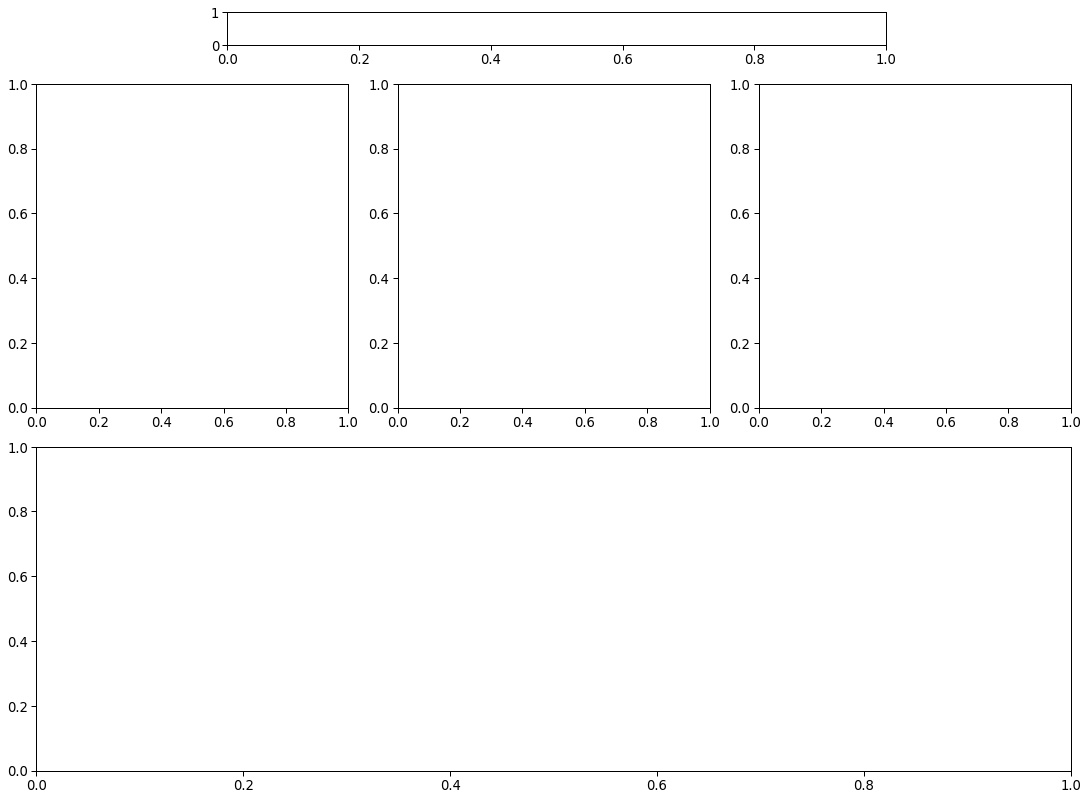

In [10]:
fig = plt.figure(figsize=(15, 11), constrained_layout=True)
gs = fig.add_gridspec(nrows=3, ncols=6, height_ratios=(1, 10, 10))
ax_1 = fig.add_subplot(gs[1, 0:2])
ax_2 = fig.add_subplot(gs[1, 2:4])
ax_3 = fig.add_subplot(gs[1, 4:6])
ax_4 = fig.add_subplot(gs[0, 1:5])
ax_5 = fig.add_subplot(gs[2, :])

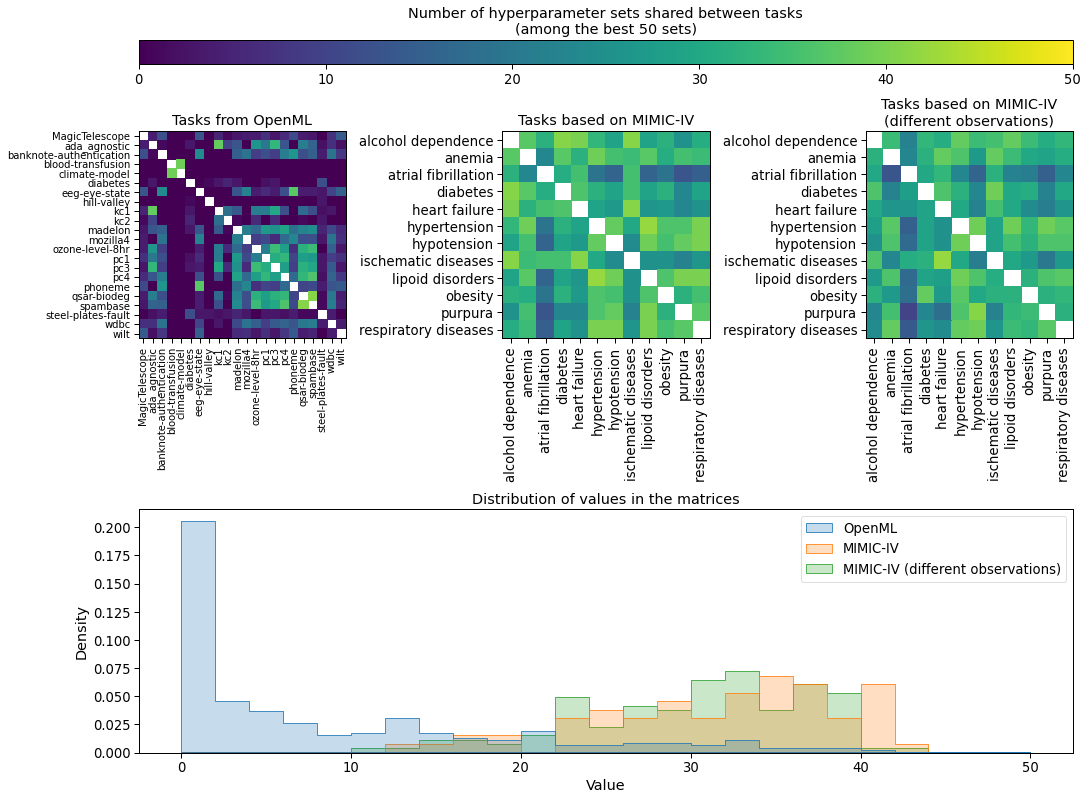

In [11]:
fig = plt.figure(figsize=(15, 11), constrained_layout=True)
gs = fig.add_gridspec(nrows=3, ncols=3, height_ratios=(1, 10, 10))
ax_1 = fig.add_subplot(gs[1, 0])
ax_2 = fig.add_subplot(gs[1, 1])
ax_3 = fig.add_subplot(gs[1, 2])
ax_4 = fig.add_subplot(gs[0, 0:3])
ax_5 = fig.add_subplot(gs[2, :])

sns.heatmap(heatmap_openml, ax=ax_1, cmap='viridis', vmin=0, vmax=threshold, square=True, cbar=False,
            xticklabels=targets_openml, yticklabels=targets_openml)
# ax_1.set_facecolor('#404040')
# ax_1.set(ylabel='OpenML\ntask:', xlabel='task:\nOpenML')
ax_1.set_title('Tasks from OpenML')
for _, spine in ax_1.spines.items():
    spine.set_visible(True)
ax_1.tick_params(axis='both', which='major', labelsize=10)
    
sns.heatmap(heatmap_mimic_1, ax=ax_2, cmap='viridis', vmin=0, vmax=threshold, square=True, cbar=False)
# ax_2.set_facecolor('#404040')
# ax_2.set(ylabel='MIMIC-IV\ntask:', xlabel='task:\nMIMIC-IV')
ax_2.set_title('Tasks based on MIMIC-IV')
for _, spine in ax_2.spines.items():
    spine.set_visible(True)

sns.heatmap(heatmap_mimic_2, ax=ax_3, cmap='viridis', vmin=0, vmax=threshold, square=True, cbar=False)
# ax_3.set_facecolor('#404040')
# ax_3.set(ylabel='MIMIC-IV half 1\ntask:', xlabel='task:\nMIMIC-IV half 2')
ax_3.set_title('Tasks based on MIMIC-IV\n(different observations)')
for _, spine in ax_3.spines.items():
    spine.set_visible(True)

plt.colorbar(ax_1.get_children()[0], cax=ax_4, orientation='horizontal')
ax_4.set_title(f'Number of hyperparameter sets shared between tasks\n(among the best {threshold} sets)')

sns.histplot(histogram_data, x='Value', hue='Type', binwidth=2, binrange=(0, threshold), element='step', stat='density', common_norm=False, ax=ax_5)
ax_5.set_title('Distribution of values in the matrices')
ax_5.get_legend().set_title(None)

plt.savefig('./results_1.pdf', format='pdf', bbox_inches='tight')